In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
seed(2)
df = pd.read_csv('train_preprocessed.csv', header=0)

#with all
#X=df.iloc[:,1:24]
#y=df.iloc[:,24:25]

#with new features added
X=df.iloc[:,1:44]
y=df.iloc[:,44:45]

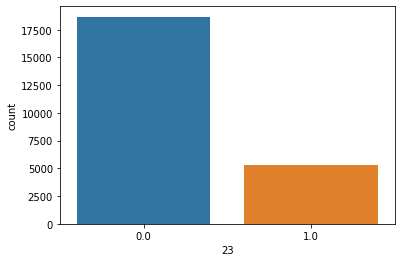

In [88]:
#data set

sns.countplot(df['23'],label="Sum")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

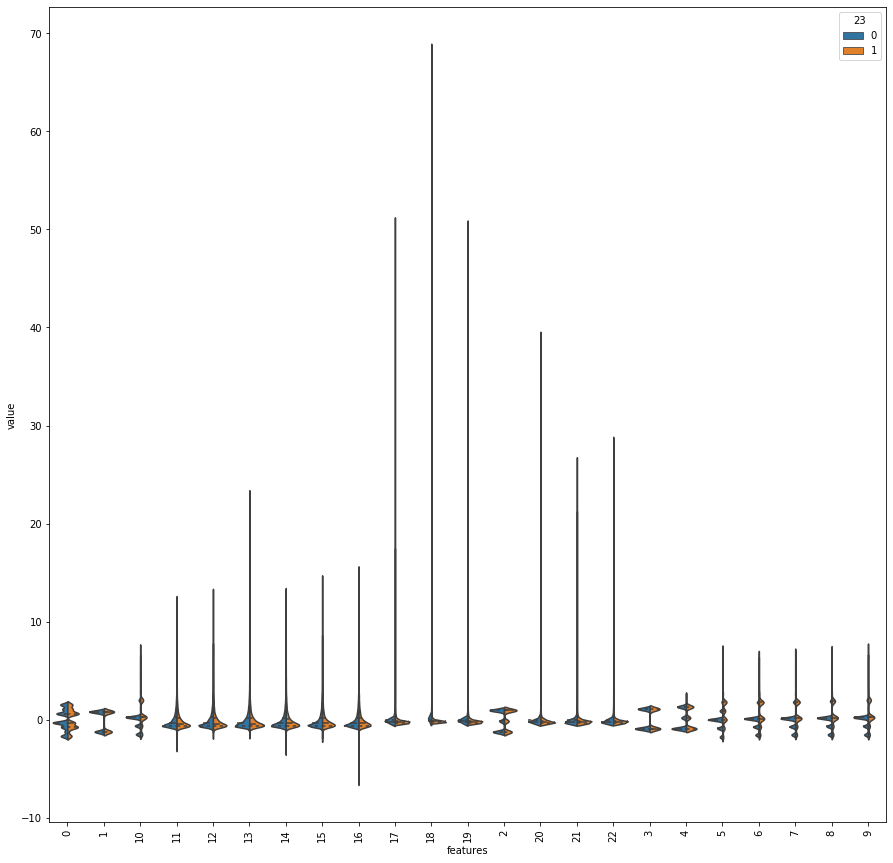

In [31]:
#violin graph

data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())      # standardization
data = pd.concat([y,data_n_2.iloc[:,0:23]],axis=1)
data = pd.melt(data,id_vars="23",
                    var_name="features",
                    value_name="value")
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="23", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\AkeshalaMarasinghe\.conda\envs\HackStat2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\AkeshalaMarasinghe\.conda\envs\HackStat2.0\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


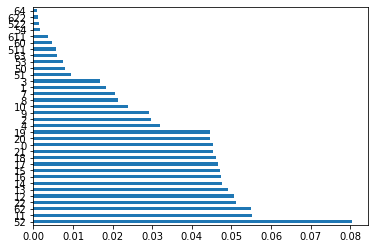

In [121]:
#Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(34).plot(kind='barh')
plt.show()

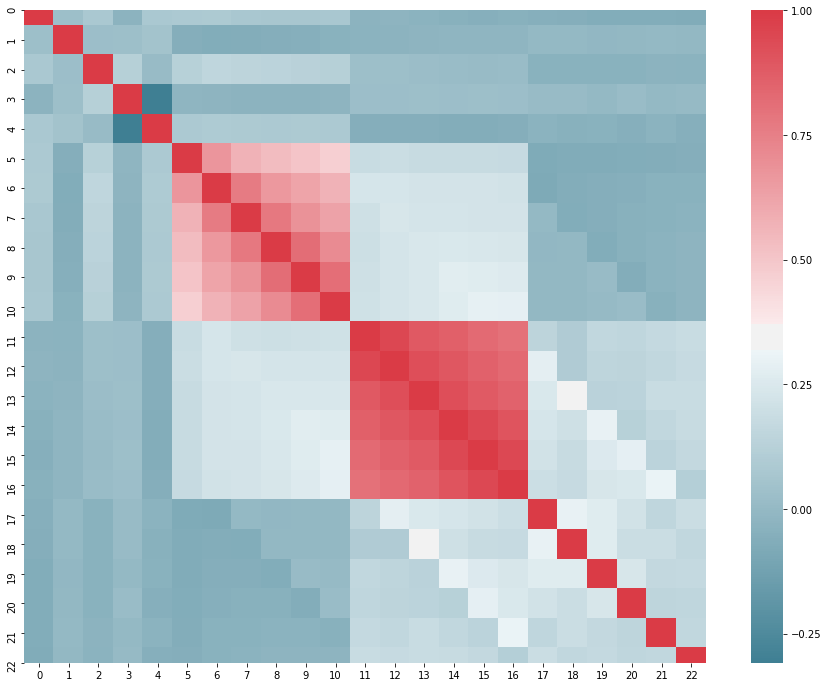

In [36]:
# Correlation

f,ax=plt.subplots(figsize=(16,12))
corr=X.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

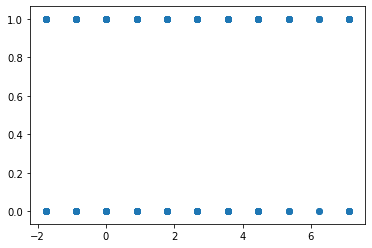

In [105]:
#Scatter graph with y

#first 11 features are categorical [0-10]
#next s12 is continuous [11-22]

x=X['5']  #feature
plt.scatter(x,y)
plt.show()
#print(min(x))

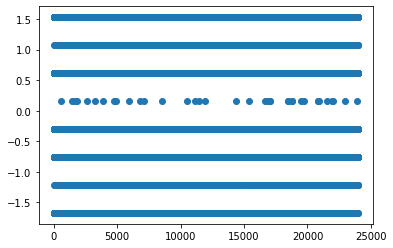

In [89]:
#Scatter graph

m=X.shape[0]

#dataset.loc[709,18]=dataset[18].mean()

#print(min(dataset[0]))
#print(dataset[18].idxmax())

plt.scatter([i for i in range(m)] ,X['0'])
plt.show()